In [1]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.optim import lr_scheduler
import numpy as np
import torchvision
from torchvision import datasets, models, transforms
import matplotlib.pyplot as plt
import warnings
import time
import copy
warnings.filterwarnings('ignore')


In [18]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [19]:
cd /content/drive/MyDrive/mask_or_no_mask/

/content/drive/MyDrive/mask_or_no_mask


In [4]:
batch_size = 20
transformation_train = transforms.Compose([
        transforms.RandomResizedCrop(224),
        transforms.RandomHorizontalFlip(),
        transforms.ToTensor(),
        transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
    ])
      

 

transformation_test=transforms.Compose([
        transforms.Resize(256),
        transforms.CenterCrop(224),
        transforms.ToTensor(),
        transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
    ])

 
data_dir = 'data/mask'
# importing dataset
trainset = datasets.ImageFolder(root=data_dir + '/train', transform=transformation_train)

testset = trainset = datasets.ImageFolder(root=data_dir + '/train', transform=transformation_test)

trainloader = torch.utils.data.DataLoader(trainset,
                                          batch_size = 20,
                                          shuffle = True)
testloader =  torch.utils.data.DataLoader(testset,
                                         batch_size = 20,
                                         shuffle = True)

In [5]:
def imshow(inp, title=None):
    """Imshow for Tensor."""
    inp = inp.numpy().transpose((1, 2, 0))
    mean = np.array([0.485, 0.456, 0.406])
    std = np.array([0.229, 0.224, 0.225])
    inp = std * inp + mean
    inp = np.clip(inp, 0, 1)
    plt.imshow(inp)

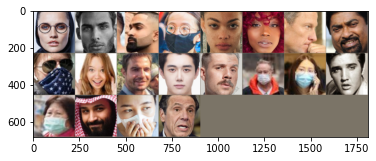

In [6]:
inputs, classes = next(iter(trainloader))
class_names = trainset.classes

# Make a grid from batch
out = torchvision.utils.make_grid(inputs)

imshow(out, title=[class_names[x] for x in classes])

In [7]:
model = torchvision.models.resnet18(pretrained=True)
for param in model.parameters():
    param.requires_grad = False

# Parameters of newly constructed modules have requires_grad=True by default
num_ftrs = model.fc.in_features
model.fc = nn.Linear(num_ftrs, 2)


criterion = nn.CrossEntropyLoss()

# Observe that only parameters of final layer are being optimized as
# opposed to before.
optimizer = optim.SGD(model.fc.parameters(), lr=0.001, momentum=0.9)



Downloading: "https://download.pytorch.org/models/resnet18-5c106cde.pth" to /root/.cache/torch/hub/checkpoints/resnet18-5c106cde.pth


In [13]:
numOfEpochs = 10
train_count = len(trainloader) * batch_size
test_count  = len(testloader)  * batch_size
train_losses = []
test_losses  = []
train_acurracies = []
test_acurracies  = []

# training with the number of epochs.
for epoch in range(numOfEpochs):
    train_loss = 0.0
    test_loss = 0.0
    train_acc = 0.0
    test_acc = 0.0
  
    # training the model with the train dataset.
    for train_images, train_labels in trainloader:
    
        
    
        # calculating loss for training
        # dataset for the current batch.
        train_labels_head = model(train_images)
        loss = criterion(train_labels_head, train_labels)
    
        # updating weights.
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()  
    
        # calculating acurracy for the current
        # batch for the training dataset.
        predictions = torch.max( train_labels_head , 1)[1] 
        acurracy = torch.sum( predictions == train_labels )
    
        # summing training acurracy and 
        # loss wit the remaining batches.
        train_acc += acurracy 
        train_loss += loss.item()
    
    print("EPOCH --> " + str(epoch + 1))
    print("----------------------------------------------")
  
    # testing the current model within the current epoch.
    for test_images, test_labels in testloader:
    
        # registering test images and labels 
        # to device to benefit from GPU
        
        # calculating loss for test 
        # dataset for the current batch.
        test_labels_head = model(test_images)
        loss = criterion(test_labels_head, test_labels)
    
        # calculating acurracy for the cur-
        # rent batch for the test dataset.
        predictions = torch.max( test_labels_head , 1)[1] 
        acurracy = torch.sum( predictions == test_labels )
    
        # summing test acurracy and 
        # loss wit the remaining batches.
        test_acc += acurracy 
        test_loss += loss.item()
 
    # printing out the training dataset 
    # results for the current batch.
    train_acc = float(train_acc.float()) / train_count
    train_acurracies.append( train_acc )
    print("Train Acurracy: " + str( float(train_acc) ))
    
    train_loss = train_loss / train_count
    train_losses.append( train_loss )
    print("Train Loss: " + str(train_loss) + "\n")
  
    # printing out the test dataset 
    # results for the current batch.
    test_acc = float(test_acc.float()) / test_count
    test_acurracies.append( test_acc )
    print("Test Acurracy: " + str( float(test_acc) ))    
    
    test_loss = test_loss / test_count
    test_losses.append( test_loss )
    print("Test Loss: " + str(test_loss))
    print("----------------------------------------------\n")

EPOCH --> 1
----------------------------------------------
Train Acurracy: 0.8978260869565218
Train Loss: 0.01304722827170854

Test Acurracy: 0.9315217391304348
Test Loss: 0.009150701225397812
----------------------------------------------

EPOCH --> 2
----------------------------------------------
Train Acurracy: 0.9460144927536231
Train Loss: 0.007838099536256514

Test Acurracy: 0.9550724637681159
Test Loss: 0.006519989322439052
----------------------------------------------

EPOCH --> 3
----------------------------------------------
Train Acurracy: 0.9507246376811594
Train Loss: 0.007011980737181569

Test Acurracy: 0.961231884057971
Test Loss: 0.005652289211318113
----------------------------------------------

EPOCH --> 4
----------------------------------------------
Train Acurracy: 0.9634057971014492
Train Loss: 0.005808565918140222

Test Acurracy: 0.9532608695652174
Test Loss: 0.006617852675634018
----------------------------------------------

EPOCH --> 5
----------------------

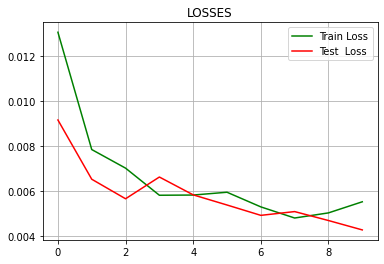

In [14]:
plt.title("LOSSES")
plt.plot(train_losses, label = "Train Loss", color= "green")
plt.plot(test_losses,  label = "Test  Loss", color= "red")
plt.legend()
plt.grid()

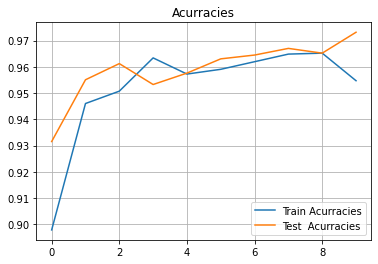

In [15]:
plt.title("Acurracies")
plt.plot(train_acurracies, label = "Train Acurracies")
plt.plot(test_acurracies,  label = "Test  Acurracies")
plt.legend()
plt.grid()